# Frequencies and Weirdness

In [1]:
# сначала откроем списки, которые понадобятся для подсчетов
import ast
with open("prince_lemmas.txt", "r", encoding='utf-8') as file:
    text = file.read()
prince_lemmas = ast.literal_eval(text)

with open("corpus_lemmas.txt", "r", encoding='utf-8') as file:
    text = file.read()
corpus_lemmas = ast.literal_eval(text)

In [2]:
# посмотрим на самые частотные слова из "Маленького принца"
from collections import Counter
print(Counter(prince_lemmas).most_common(50))

[('Я', 555), ('И', 456), ('ОН', 369), ('НЕ', 329), ('МАЛЕНЬКИЙ', 202), ('БЫТЬ', 201), ('ТЫ', 188), ('НА', 182), ('В', 181), ('ПРИНЦ', 180), ('ЧТО', 178), ('ЭТО', 161), ('СКАЗАТЬ', 135), ('ОНИ', 132), ('А', 126), ('НО', 116), ('КАК', 97), ('У', 96), ('ОНА', 93), ('С', 88), ('МОЙ', 78), ('ОЧЕНЬ', 78), ('ОДИН', 68), ('ВЕСЬ', 65), ('ПЛАНЕТА', 65), ('ЭТОТ', 63), ('ЕСЛИ', 58), ('ТАК', 58), ('КОГДА', 57), ('ДА', 57), ('ТАКОЙ', 56), ('ВОТ', 54), ('ВСЕ', 53), ('О', 52), ('МОЧЬ', 52), ('ЧЕЛОВЕК', 52), ('ЗВЕЗДА', 50), ('ВЫ', 50), ('ЖЕ', 49), ('СПРАШИВАТЬ', 46), ('НЕТ', 44), ('СВОЙ', 43), ('ЧТОБЫ', 43), ('ЕЩЕ', 42), ('ОТВЕЧАТЬ', 42), ('ВИДЕТЬ', 41), ('ЗНАТЬ', 41), ('БАРАШЕК', 41), ('ДЕНЬ', 41), ('ВЕДЬ', 40)]


Можно про это что-то сказать, но сначала сделаем список

In [3]:
count_prince_lemmas = Counter(prince_lemmas)
type(count_prince_lemmas)

collections.Counter

In [4]:
len(count_prince_lemmas)

2013

In [5]:
# про сортироваку словаря https://www.freecodecamp.org/news/sort-dictionary-by-value-in-python/
sorted_freq = dict(sorted(count_prince_lemmas.items(), key=lambda item: item[1], reverse=True))
#sorted_freq

In [6]:
# список ключей
absolute_freq = list(sorted_freq.keys())
print(absolute_freq[0:49])

['Я', 'И', 'ОН', 'НЕ', 'МАЛЕНЬКИЙ', 'БЫТЬ', 'ТЫ', 'НА', 'В', 'ПРИНЦ', 'ЧТО', 'ЭТО', 'СКАЗАТЬ', 'ОНИ', 'А', 'НО', 'КАК', 'У', 'ОНА', 'С', 'МОЙ', 'ОЧЕНЬ', 'ОДИН', 'ВЕСЬ', 'ПЛАНЕТА', 'ЭТОТ', 'ЕСЛИ', 'ТАК', 'КОГДА', 'ДА', 'ТАКОЙ', 'ВОТ', 'ВСЕ', 'О', 'МОЧЬ', 'ЧЕЛОВЕК', 'ЗВЕЗДА', 'ВЫ', 'ЖЕ', 'СПРАШИВАТЬ', 'НЕТ', 'СВОЙ', 'ЧТОБЫ', 'ЕЩЕ', 'ОТВЕЧАТЬ', 'ВИДЕТЬ', 'ЗНАТЬ', 'БАРАШЕК', 'ДЕНЬ']


Очевидно, что в списке есть лишние слова, надо от них как-то избавляться. Обычно в этом месте применяют списки стоп-слов. Но какой список стоп-слов взять? Хотелось бы вдуматься, по какому принципу составляют списки стоп-слов. Как можно делать:
* взять откуда-то, например из nltk, их там 151, и они не леммы ;
* (https://anoncvs.postgresql.org/cvsweb.cgi/pgsql/src/backend/snowball/stopwords/russian.stop?rev=1.1;content-type=text%2Fplain)

* или из словаря Ляшевской, Шарова взять и вычеркнуть первые 150 или 100 или как-то так
* (http://dict.ruslang.ru/freq.php?act=show&dic=freq_freq&title=%D7%E0%F1%F2%EE%F2%ED%FB%E9%20%F1%EF%E8%F1%EE%EA%20%EB%E5%EC%EC)

* посмотреть частоты по всему СинТагРусу и вычеркнуть первые сколько-то самых частотных из него, смотрим ниже

In [7]:
print(Counter(corpus_lemmas).most_common(50))

[('В', 52870), ('И', 52019), ('НЕ', 24761), ('НА', 24296), ('БЫТЬ', 19159), ('ЧТО', 17780), ('С', 17134), ('ОН', 16643), ('Я', 11862), ('ЭТО', 10524), ('ОНИ', 10035), ('А', 9906), ('ПО', 9119), ('ЭТОТ', 9039), ('КОТОРЫЙ', 8676), ('НО', 8621), ('КАК', 8447), ('К', 8315), ('ТО', 8100), ('ГОД', 7706), ('ОНА', 7479), ('МЫ', 7106), ('ИЗ', 7076), ('О', 6823), ('ДЛЯ', 5857), ('СВОЙ', 5780), ('МОЧЬ', 5508), ('ОТ', 5417), ('ВЕСЬ', 5405), ('У', 5312), ('ЗА', 5202), ('ЧЕЛОВЕК', 5081), ('ТОТ', 4729), ('ОДИН', 4527), ('ТАКОЙ', 4375), ('ЖЕ', 4269), ('ВСЕ', 4154), ('ТАК', 3632), ('ИЛИ', 3631), ('ТОЛЬКО', 3565), ('УЖЕ', 3339), ('ЕЩЕ', 3327), ('ЕСЛИ', 3299), ('ДРУГОЙ', 3298), ('ВРЕМЯ', 3073), ('СЕБЯ', 3040), ('КОГДА', 2948), ('БЫ', 2944), ('ДО', 2918), ('НАШ', 2891)]


In [8]:
count_corpus_lemmas = Counter(corpus_lemmas)
type(count_corpus_lemmas)

collections.Counter

In [9]:
len(count_corpus_lemmas)

55726

In [10]:
# сортировка словаря
sorted_freq_corpus = dict(sorted(count_corpus_lemmas.items(), key=lambda item: item[1], reverse=True))
#sorted_freq_corpus

In [11]:
# список ключей
absolute_freq_corpus = list(sorted_freq_corpus.keys())
print(absolute_freq_corpus[0:49])

['В', 'И', 'НЕ', 'НА', 'БЫТЬ', 'ЧТО', 'С', 'ОН', 'Я', 'ЭТО', 'ОНИ', 'А', 'ПО', 'ЭТОТ', 'КОТОРЫЙ', 'НО', 'КАК', 'К', 'ТО', 'ГОД', 'ОНА', 'МЫ', 'ИЗ', 'О', 'ДЛЯ', 'СВОЙ', 'МОЧЬ', 'ОТ', 'ВЕСЬ', 'У', 'ЗА', 'ЧЕЛОВЕК', 'ТОТ', 'ОДИН', 'ТАКОЙ', 'ЖЕ', 'ВСЕ', 'ТАК', 'ИЛИ', 'ТОЛЬКО', 'УЖЕ', 'ЕЩЕ', 'ЕСЛИ', 'ДРУГОЙ', 'ВРЕМЯ', 'СЕБЯ', 'КОГДА', 'БЫ', 'ДО']


Видно, что верхняя часть списка для "Маленького приинца" и для всего корпуса существенно пересекаются. Но мне не нравится идея стирать из списка к "Маленькому принцу", например, слово "я". По моему ощущению то, что оно в тексте имеет самую высокую частоту, существенно. Говорящий - одно из главных действующее лицо. "Я", кстати входит в список nltk и в первую десятку у Ляшевской, Шарова. Посмотрим оотносительные частоты.

In [12]:
type(sorted_freq)

dict

In [13]:
sorted_freq["Я"]

555

In [14]:
#relative_freq_prince
#для каждой пары в словаре sorted_freq нужно  у ключа значение поделить на длину prince_lemmas 
# и записать полученной число в качестве нового значения в новый словарь
relative_freq_prince = {}
for key, value in sorted_freq.items():
    relative_freq_prince[key] = (value / len(prince_lemmas))


In [15]:
#print(relative_freq_prince)

In [16]:
# то же для всего корпуса
relative_freq_corpus = {}
for key, value in sorted_freq_corpus.items():
    relative_freq_corpus[key] = (value / len(corpus_lemmas))

In [17]:
#print(relative_freq_corpus)

Здесь сразу видно ( если раскомментировать ячейки, которые я закомментировала для обозримоси в Гитхабе), что относительная частота "И" почти одинакова, а относительная частота "Я" отличается почти в 20 раз. Как массовым образом сравнить относительные частоты в "Маленьком принце" и в корпусе? Для это существует специальный показатель, который называют Weirdness: относительную частоту леммы в "Маленьком принце" делим на ее же относительную частоту в корпусе.

In [18]:
weirdness_prince = {}
for key, value in relative_freq_prince.items():
    weirdness_prince[key] = (value / relative_freq_corpus[key])

In [19]:
#weirdness_prince

In [20]:
# нужно отсортировать, чтобы оценить результат
sorted_weirdness = dict(sorted(weirdness_prince.items(), key=lambda item: item[1], reverse=True))
print(sorted_weirdness)

{'ЧЕСТОЛЮБЕЦ': 123.68328302194665, 'НАМОРДНИК': 123.68328302194665, 'ВЕРТ': 123.68328302194665, 'ФОНАРЩИК': 123.68328302194664, 'ПЛАНЕТКА': 123.68328302194664, '612': 123.68328302194664, 'ПРАВОПИСАНИЕ': 123.68328302194664, 'ГОРНОСТАЕВЫЙ': 123.68328302194664, 'ГАЛЬ': 123.68328302194664, 'ЗАГЛАТЫВАТЬ': 123.68328302194664, 'БРИДЖ': 123.68328302194664, 'НАЦАРАПЫВАТЬ': 123.68328302194664, 'ПРОСИЯТЬ': 123.68328302194664, '3251': 123.68328302194664, 'ПО-ТУРЕЦКИ': 123.68328302194664, 'ПОНЕМНОЖКУ': 123.68328302194664, 'РАССУДИТЕЛЬНО': 123.68328302194664, 'АЗБУЧНЫЙ': 123.68328302194664, 'НРАВОУЧЕНИЕ': 123.68328302194664, 'НИЗАЧЕМ': 123.68328302194664, 'ОТРАЩИВАТЬ': 123.68328302194664, 'БЫЛИНКА': 123.68328302194664, 'ВСТРЕПАННЫЙ': 123.68328302194664, 'ПОЗЕВЫВАТЬ': 123.68328302194664, 'ИЗМУЧИВАТЬСЯ': 123.68328302194664, 'ЗАКАШЛЯТЬ': 123.68328302194664, 'ПОМУЧИТЬ': 123.68328302194664, 'РАЗОЗЛИТЬСЯ': 123.68328302194664, '325': 123.68328302194664, '326': 123.68328302194664, 'ПУРПУР': 123.683283021946

Какой интересный и дурацкий результат!
Вперед вышли слова, которые для "Маленького принца" уникальны. Это получается при нашем корпусе совершенно не то, что нужно. Всё потому, что количество слов сокращается и остается длина корпуса, деленна на длину принца, все остальные слова имеют еще какие-то коэффициенты меньше единице, а эти вырываются вперед. Их несколько десятков, и сразу после них идут довольно хорошие слова.
* в приступе отчаяния решила для учета количества слов в самой сказке возвести относительную частоту в сказке в квадрат

In [21]:
new_weirdness_prince = {}
for key, value in relative_freq_prince.items():
    new_weirdness_prince[key] = (value ** 2/ relative_freq_corpus[key])

In [22]:
# сортируем это новое изобретение
sorted_new_weirdness = dict(sorted(new_weirdness_prince.items(), key=lambda item: item[1], reverse=True))
print(sorted_new_weirdness)

{'ПРИНЦ': 1.5568706589086394, 'МАЛЕНЬКИЙ': 0.6794491085484001, 'БАРАШЕК': 0.3944809871528416, 'ЛИС': 0.27280032490710776, 'Я': 0.26203232177544356, 'ЦВЕТОК': 0.2483896207945408, 'ФОНАРЩИК': 0.22199822358512084, 'ТЫ': 0.21654537766717755, 'БАОБАБ': 0.1834696062686949, 'ГЕОГРАФ': 0.17115597307873825, 'ЗВЕЗДА': 0.15382360281674115, 'ПЛАНЕТА': 0.14024259788384202, 'ПРИРУЧАТЬ': 0.12151039131837106, 'ШИП': 0.11368999935116793, 'ЧЕСТОЛЮБЕЦ': 0.1009082834477822, 'РОЗА': 0.09687195210987093, 'УДАВ': 0.09392232536293574, 'ПЛАНЕТКА': 0.09081745510300397, 'ПУСТЫНЯ': 0.08279065982874857, 'ОН': 0.08255586602495626, 'РИСОВАТЬ': 0.07948467865425306, 'СКАЗАТЬ': 0.07779413984077117, 'КОРОЛЬ': 0.07624181416054655, 'ПЬЯНИЦА': 0.0718229546893038, 'СТРЕЛОЧНИК': 0.07175700156286734, 'ГМ': 0.06458130140658061, 'УГОВОР': 0.06458130140658061, 'ПОТУХАТЬ': 0.05449047306180238, 'ВУЛКАН': 0.054058008989883326, 'ПЯТЬСОТ': 0.05381775117215051, 'ПРОМОЛВИТЬ': 0.051895688630288, 'НАМОРДНИК': 0.0504541417238911, 'КОЛОДЕЦ

неожиданно хороший результат вышел, сделаем из него даже картинку

In [23]:
!pip3 install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip


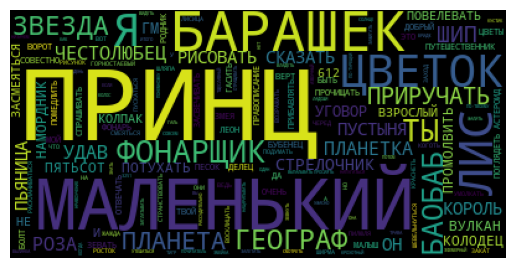

In [24]:
wordcloud = WordCloud().generate_from_frequencies(sorted_new_weirdness)
plt.imshow(wordcloud) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение

In [25]:
# а теперь попробуем красиво
# комментарии и подробности тут: https://github.com/TFrolova/Project_CL_Python/blob/main/notebooks/creating%20a%20picture%20How.ipynb
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [26]:
mask = np.array(Image.open("prince_and_fox.png"))
print(mask)

[[7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]
 ...
 [7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]]


In [27]:
def transform_zeros(val):
    if val == 7: 
       return 255
    else:
       return val

In [28]:
maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

In [29]:
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

In [30]:
wc = WordCloud(background_color="white", max_words=2000, mask=maskable_image,
                contour_width=3, contour_color='steelblue')
wc.generate_from_frequencies(sorted_new_weirdness)

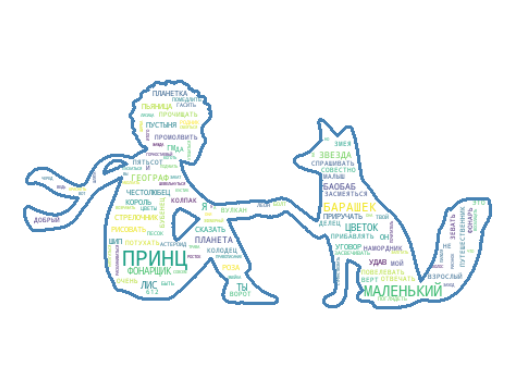

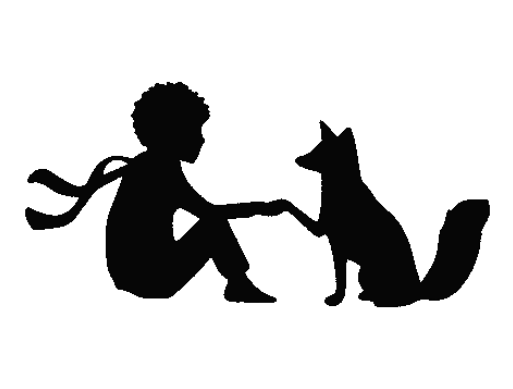

In [31]:
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(maskable_image, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

Нужно еще смотреть на то, что получится, если применить tfidf, это здесь https://github.com/TFrolova/Project_CL_Python/blob/main/notebooks/TfIdf%20sklearn%20for%20%22Маленький%20принц%22%20-%20LEMMAS.ipynb

после tfidf, с которым, к тому же пришлось изрядно повозиться, мне всё равно больше нравится список и картинка с квадратной странностью